In [1]:
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)
dataset=pd.read_csv('dataset4.csv')

In [2]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
###THIS SECTION IS DATASET SPECIFIC PROCESSING
drop_columns=['RowNumber','CustomerId','Surname']
dataset.drop(drop_columns, axis=1, inplace=True)

###THIS SECTION IS DATASET SPECIFIC PROCESSING


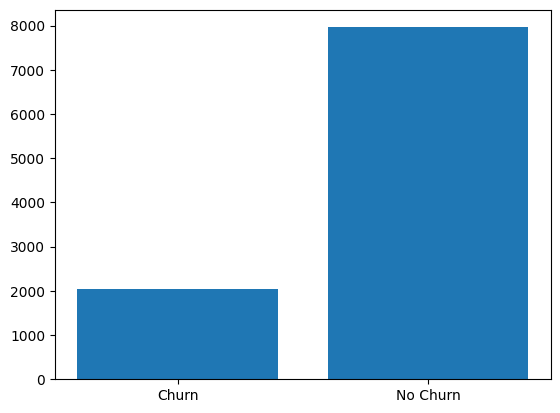

In [4]:
from pre_processor import PreProcessor


label_column = 'Exited'
pre_processor = PreProcessor(dataset)
pre_processor.rename_label(label_column).split_features_labels().plot_imbalance()
   

In [5]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
dataset.describe()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
binary_encode_columns=[]
one_hot_encode_columns=['Geography','Gender']
ordinal_encode_columns=[]
scaling_columns=['CreditScore','Age','Tenure','Balance','EstimatedSalary']


In [8]:
scaling_columns

['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

In [9]:

pre_processor.\
    remove_nans().\
    remove_duplicates().\
    scale(scaling_columns).\
    binary_encode(binary_encode_columns).\
    onehot_encode(one_hot_encode_columns).\
    ordinal_encode(ordinal_encode_columns).\
    oversample()
    

In [10]:
pre_processor.dataset

,CreditScore,Geography_1,Geography_2,Geography_3,Gender_1,Gender_2,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,-0.326221,1,0,0,1,0,0.293517,-1.041760,-1.225848,1,1,1,0.021886,1.0
1,-0.440036,0,1,0,1,0,0.198164,-1.387538,0.117350,1,0,1,0.216534,0.0
2,-1.536794,1,0,0,1,0,0.293517,1.032908,1.333053,3,1,0,0.240687,1.0
3,0.501521,1,0,0,1,0,0.007457,-1.387538,-1.225848,2,0,0,-0.108918,0.0
4,2.063884,0,1,0,1,0,0.388871,-1.041760,0.785728,1,1,1,-0.365276,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15921,-0.046858,1,0,0,1,0,0.293517,-0.695982,1.581459,2,0,0,-0.573242,1.0
15922,-0.005471,0,0,1,1,0,0.579578,1.378686,1.216158,3,1,0,0.882404,1.0
15923,-0.522810,1,0,0,1,0,0.960993,0.341352,-1.225848,1,0,1,0.834631,1.0
15924,-1.578181,0,0,1,0,1,0.293517,-0.695982,1.210909,1,1,1,-0.811111,1.0


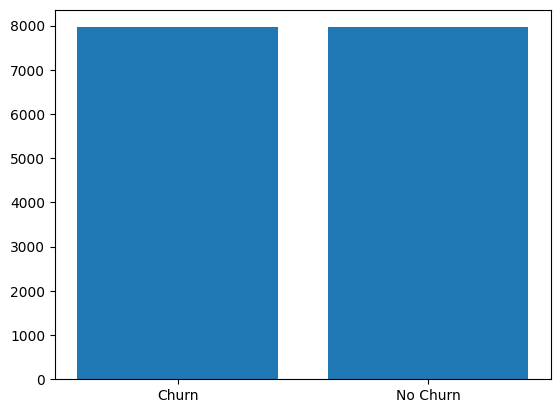

In [11]:
pre_processor.plot_imbalance()

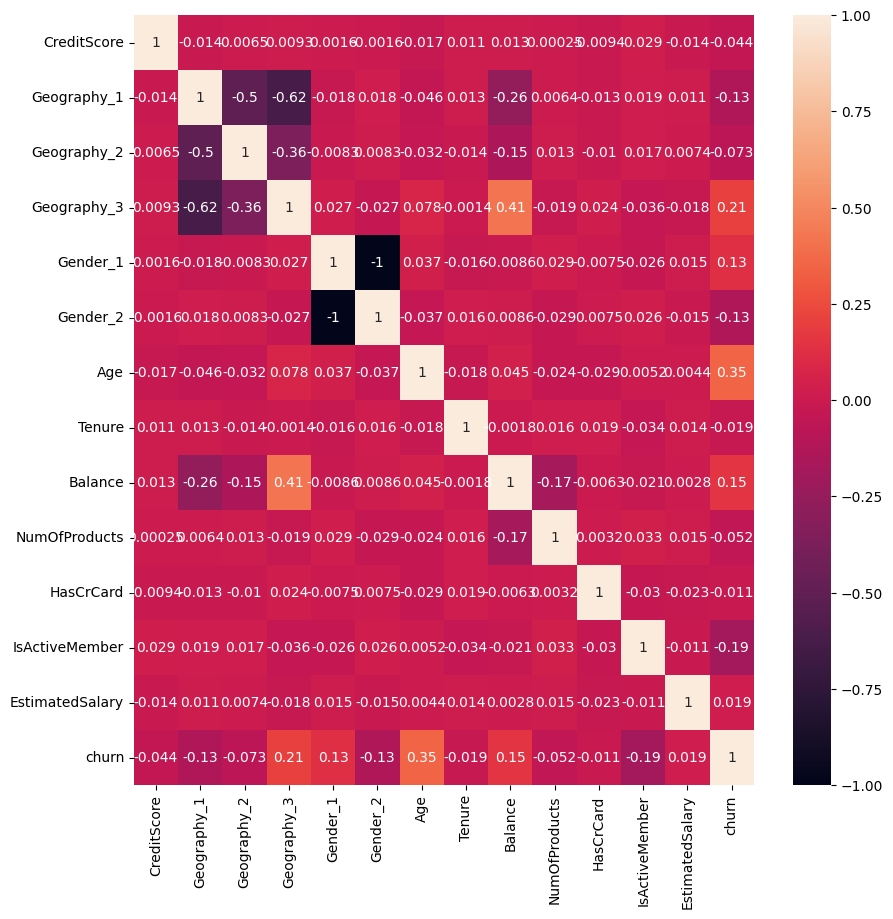

In [12]:
pre_processor.plot_correlation()

In [13]:
pre_processor.calculate_feature_importance()

,importance
Age,0.250779
EstimatedSalary,0.142033
Balance,0.142024
CreditScore,0.136711
NumOfProducts,0.127021
Tenure,0.082780
IsActiveMember,0.036459
Geography_3,0.025130
HasCrCard,0.017572
Geography_1,0.011358


In [14]:
pre_processor.remove_features_by_importance(0.00)

In [15]:
pre_processor.split_features_labels()

In [16]:
pre_processor.calculate_feature_importance()

,importance
Age,0.253579
Balance,0.142903
EstimatedSalary,0.139342
CreditScore,0.136571
NumOfProducts,0.129353
Tenure,0.082177
IsActiveMember,0.035858
Geography_3,0.024563
HasCrCard,0.017448
Geography_1,0.010349


In [17]:
X_train,X_test,y_train,y_test = pre_processor.train_test_split()

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)


In [19]:
from train_setup import Model_selection

model_select=Model_selection()

model_select.train(X_train,y_train,X_test,y_test,n_trials_=10)

[I 2024-06-11 12:48:57,577] A new study created in memory with name: no-name-878b0f0e-fbb0-4bfa-8667-5ff15706f95b
[I 2024-06-11 12:49:00,267] Trial 0 finished with value: 0.8558084772370487 and parameters: {'n_estimators': 28, 'max_depth': 30, 'min_samples_split': 9, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.8558084772370487.
[I 2024-06-11 12:49:18,357] Trial 1 finished with value: 0.8426216640502355 and parameters: {'n_estimators': 195, 'max_depth': 23, 'min_samples_split': 17, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.8558084772370487.
[I 2024-06-11 12:49:26,179] Trial 2 finished with value: 0.817425431711146 and parameters: {'n_estimators': 92, 'max_depth': 17, 'min_samples_split': 7, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.8558084772370487.
[I 2024-06-11 12:49:27,421] Trial 3 finished with value: 0.7142072213500785 and parameters: {'n_estimators': 25, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 17}. Best is trial 0 with value: 0

In [20]:
model_select.classification_reports()

Random Forest
              precision    recall  f1-score   support

         0.0       0.93      0.84      0.88      1609
         1.0       0.85      0.94      0.89      1577

    accuracy                           0.89      3186
   macro avg       0.89      0.89      0.89      3186
weighted avg       0.89      0.89      0.89      3186

Neural Network
              precision    recall  f1-score   support

         0.0       0.71      0.76      0.73      1609
         1.0       0.73      0.68      0.71      1577

    accuracy                           0.72      3186
   macro avg       0.72      0.72      0.72      3186
weighted avg       0.72      0.72      0.72      3186

Gradient Boosting
              precision    recall  f1-score   support

         0.0       0.98      0.88      0.93      1609
         1.0       0.89      0.98      0.93      1577

    accuracy                           0.93      3186
   macro avg       0.93      0.93      0.93      3186
weighted avg       0.93    

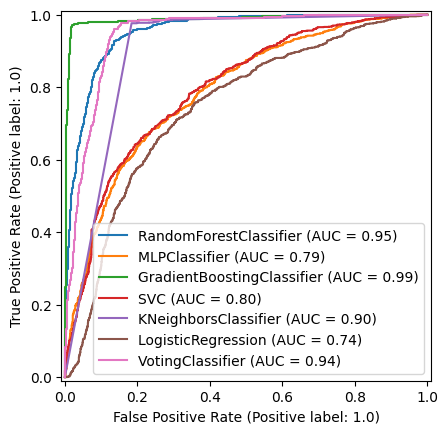

In [21]:
model_select.roc_curve()

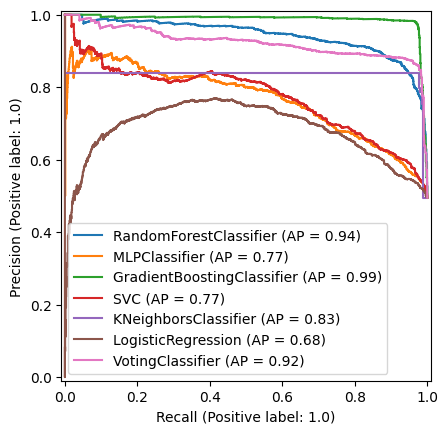

In [22]:
model_select.precision_recall_curve()

In [23]:
model_select.roc_plot.figure.savefig('images/roc_plot4.png')
model_select.pr_plot.figure.savefig('images/pr_plot4.png')